In [1]:
%matplotlib inline

In [2]:
import MySQLdb
import pandas as pd
import seaborn as sns

In [3]:
mysql_cn= MySQLdb.connect(host='localhost', 
                port=3306,user='root', 
                db='yelp_db')

In [17]:
pd.read_sql("""
select median(c)
FROM   (select business_id, count(1) as c from review group by 1) as d
""", con=mysql_cn)

,median(c)
0,9.0


In [20]:
df = pd.read_sql("""select business_id, count(1) as c from review group by 1""", con=mysql_cn)

In [25]:
df.quantile([0.1, 0.5, 0.75, 0.8, 0.95])

,c
0.10,3.0
0.50,9.0
0.75,23.0
0.80,30.0
0.95,114.0


In [27]:
len(df[df.c > 30])

31176

In [30]:
len(df)

1183362

In [28]:
df = pd.read_sql("""select user_id, count(1) as c from review group by 1""", con=mysql_cn)

In [29]:
df.quantile([0.1, 0.5, 0.75, 0.8, 0.95])

,c
0.10,1.0
0.50,1.0
0.75,3.0
0.80,4.0
0.95,13.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113259240>]], dtype=object)

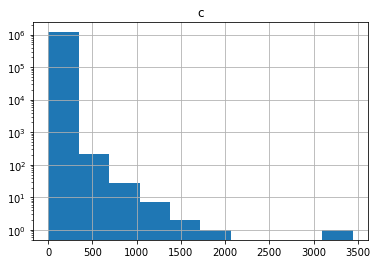

In [33]:
df.hist(log=True)

In [35]:
df = pd.read_sql("""
select * from review 
where business_id in (select business_id as c from review group by 1 having count(1) > 30 )
""", con=mysql_cn)

In [4]:
# df.to_csv("reviews.csv", index=False)

In [5]:
df = pd.read_csv("./reviews.csv")

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
df.head()

,id,stars,date,text,useful,funny,cool,business_id,user_id
0,----X0BIDP9tA49U3RvdSQ,4,2014-02-17,"Red, white and bleu salad was super yum and a ...",0,0,0.0,Ue6-WhXvI-_1xUIuapl0zQ,gVmUR8rqUFdbSeZbsg6z_w
1,---0hl58W-sjVTKi5LghGw,4,2016-07-24,Ate the momos during the momo crawl.. Was the ...,0,0,0.0,Ae4ABFarGMaI5lk1i98A0w,Y6qylbHq8QJmaCRSlKdIog
2,---3OXpexMp0oAg77xWfYA,5,2012-04-07,Pizza here made my night... Good people and gr...,2,0,0.0,lKq4Qsz13FDcAVgp49uukQ,SnXZkRN9Yf060pNTk1HMDg
3,---65iIIGzHj96QnOh89EQ,5,2015-09-11,Great brisket sandwich as claimed. Weird that ...,0,0,0.0,6nKR80xEGHYf2UxAe_Cu_g,VcmSgvslHAhqWoEn16wjjw
4,---7WhU-FtzSUOje87Y4uw,5,2016-01-22,"Interesting food, great atmosphere, and great ...",1,1,1.0,Z_mJYg3vi8cPZHa1J4BALw,NKF9v-r0jd1p0JVi9h2T1w


In [40]:
from surprise import SVD, NMF, SVDpp, SlopeOne
from surprise import Dataset, Reader
from surprise import evaluate, print_perf

In [22]:
reader = Reader(rating_scale=(1, 5))

In [28]:
data = Dataset.load_from_df(df[['user_id', 'business_id', 'stars']], reader)

In [29]:
data.split(5)  # data can now be used normally

In [41]:
# algo = SVDpp(verbose=True, lr_all=0.01, n_factors=128)
algo = SlopeOne()
perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
print_perf(perf)

Evaluating RMSE, MAE of algorithm SlopeOne.

------------
Fold 1
RMSE: 1.4133
MAE:  1.0735
------------
Fold 2
RMSE: 1.4109
MAE:  1.0711
------------
Fold 3
RMSE: 1.4108
MAE:  1.0716
------------
Fold 4
RMSE: 1.4111
MAE:  1.0715
------------
Fold 5
RMSE: 1.4111
MAE:  1.0712
------------
------------
Mean RMSE: 1.4114
Mean MAE : 1.0718
------------
------------
        Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    
RMSE    1.4133  1.4109  1.4108  1.4111  1.4111  1.4114  
MAE     1.0735  1.0711  1.0716  1.0715  1.0712  1.0718  
